C:\Users\derej\AppData\Local\Temp\ipykernel_184460\925653215.py:18: DtypeWarning: Columns (4,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


Claim Frequency: Fail to reject the null hypothesis (p = 0.7014). No significant difference detected.
Claim Severity: Fail to reject the null hypothesis (p = 0.4253). No significant difference detected.


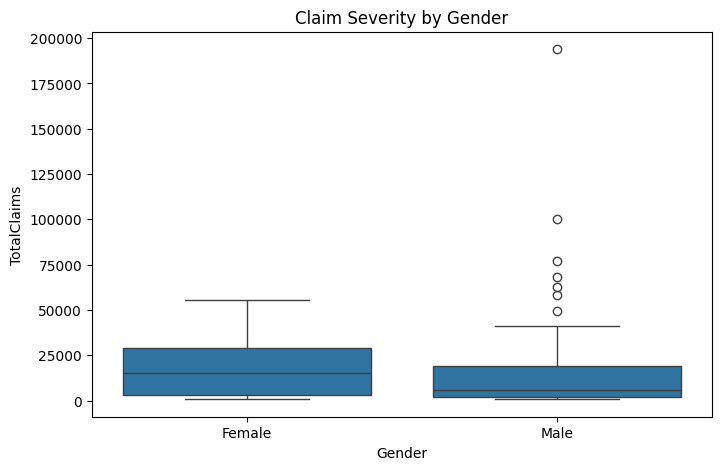

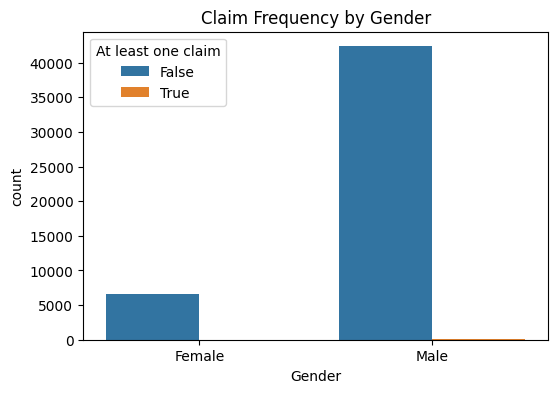

In [6]:
# notebooks/hypothesis_testing/gender_vs_premium.ipynb
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Setup paths
# ---------------------------
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(project_root)
data_path = os.path.join(project_root, "data", "processed", "insurance_data_cleaned.csv")

# ---------------------------
# Load data
# ---------------------------
df = pd.read_csv(data_path)

# ---------------------------
# Import src functions
# ---------------------------
from src.hypothesis_testing.segmentation import clean_gender, binary_split
from src.hypothesis_testing.metrics import calculate_claim_frequency, calculate_claim_severity
from src.hypothesis_testing.statistical_tests import t_test_numeric, proportion_test
from src.hypothesis_testing.reporting import interpret_p_value

# ---------------------------
# Clean Gender column
# ---------------------------
df = clean_gender(df)

# ---------------------------
# Split groups
# ---------------------------
group_a, group_b = binary_split(df, "Gender")

# ---------------------------
# Claim Frequency test
# ---------------------------
z, p = proportion_test(group_a, group_b, target="TotalClaims")
print("Claim Frequency:", interpret_p_value(p))

# ---------------------------
# Claim Severity test
# ---------------------------
severity_a = group_a[group_a["TotalClaims"] > 0]["TotalClaims"]
severity_b = group_b[group_b["TotalClaims"] > 0]["TotalClaims"]

t_stat, p_val = t_test_numeric(severity_a, severity_b)
print("Claim Severity:", interpret_p_value(p_val))

# ---------------------------
# Visualizations
# ---------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="Gender", y="TotalClaims", data=df[df["TotalClaims"]>0])
plt.title("Claim Severity by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue=(df["TotalClaims"]>0), data=df)
plt.title("Claim Frequency by Gender")
plt.legend(title="At least one claim")
plt.show()
